In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

## FETCHING DATA

In [2]:
dataset = pd.read_excel('/Users/priya/Desktop/Bootcamp_ml_problem/train_cropstatus.xlsx')
data = dataset.copy()
data.head()

,ID,Insects,Crop,Soil,Category_of_Toxicant,Does_count,Number_of_Weeks_Used,Number_Weeks_does_not used,Season,Crop_status
0,1,188,Feed,clay,1,0,0.0,0,1,0
1,2,209,Feed,clay,1,0,0.0,0,2,1
2,3,257,Feed,clay,1,0,0.0,0,2,1
3,4,257,Feed,silt,1,0,0.0,0,2,1
4,5,342,Feed,clay,1,0,0.0,0,2,1


In [3]:
#removing id column
data = data.iloc[:,1:]
data.head()

,Insects,Crop,Soil,Category_of_Toxicant,Does_count,Number_of_Weeks_Used,Number_Weeks_does_not used,Season,Crop_status
0,188,Feed,clay,1,0,0.0,0,1,0
1,209,Feed,clay,1,0,0.0,0,2,1
2,257,Feed,clay,1,0,0.0,0,2,1
3,257,Feed,silt,1,0,0.0,0,2,1
4,342,Feed,clay,1,0,0.0,0,2,1


In [4]:
data.tail()

,Insects,Crop,Soil,Category_of_Toxicant,Does_count,Number_of_Weeks_Used,Number_Weeks_does_not used,Season,Crop_status
79995,209,Food,silt,2,20,12.0,6,2,0
79996,232,Food,silt,2,20,12.0,9,1,0
79997,256,Food,silt,2,10,14.0,10,1,0
79998,256,Food,silt,2,10,16.0,8,2,0
79999,256,Food,silt,2,20,11.0,10,2,0


## EXPLAINING DATA:

In [5]:
data.shape

(80000, 9)

so we have a total 80,000 columns and 9 features where we have 8 dependent and 1 independent feature.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Insects                     80000 non-null  int64  
 1   Crop                        80000 non-null  object 
 2   Soil                        80000 non-null  object 
 3   Category_of_Toxicant        80000 non-null  int64  
 4   Does_count                  80000 non-null  int64  
 5   Number_of_Weeks_Used        71945 non-null  float64
 6   Number_Weeks_does_not used  80000 non-null  int64  
 7   Season                      80000 non-null  int64  
 8   Crop_status                 80000 non-null  int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 5.5+ MB


Among our dependent features, we have two features with object data type : Crop and Soil.


Also one feature i.e Number_of_Weeks_Used has data type float and rest have integer data type.

Feature explanation:

Insects - Average number of insects that (may) affect the crop.

Crop - Type of crop 

Soil - Type of soil 

Category_of_Toxicant - Values 1, 2, 3 represent three different toxicants available in the market.

Does_count - Represents the dosage count of toxicants.

Number_of_Weeks_Used - Represents the number of weeks for which the crop remained toxicant.

Number_Weeks_does_not used - Represents the number of weeks that the toxicants are used on the crop.

Season - Represents the various seasons (Monsoon, etc.,)

In [7]:
#check for null values
data.isna().sum()

Insects                          0
Crop                             0
Soil                             0
Category_of_Toxicant             0
Does_count                       0
Number_of_Weeks_Used          8055
Number_Weeks_does_not used       0
Season                           0
Crop_status                      0
dtype: int64

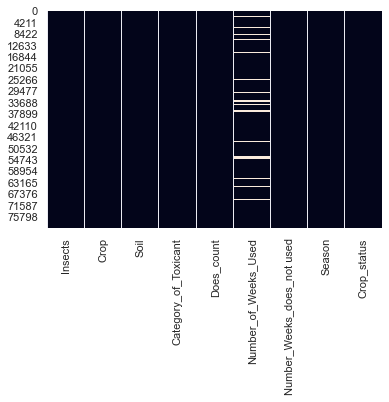

In [8]:
#plotting the same
sns.heatmap(data.isnull(), cbar=False)

We can see that we have 8055 null values in Number_of_Weeks_Used.

### Exploring target variable : Crop_status

In [9]:
#exploring target variable : Crop_status
data.Crop_status.value_counts()

0    66716
1    11183
2     2101
Name: Crop_status, dtype: int64

we can see that we have 3 classes in our target variable.


As described in problem statement,


0 ---> ‘Crop can be used further’

1 ---->crop is damaged due to nature

2 ----> toxicants

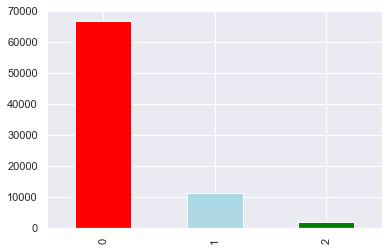

In [10]:
#plotting the same
data.Crop_status.value_counts().plot(kind="bar",color=['red','lightblue','green']);

### Seeing correlation

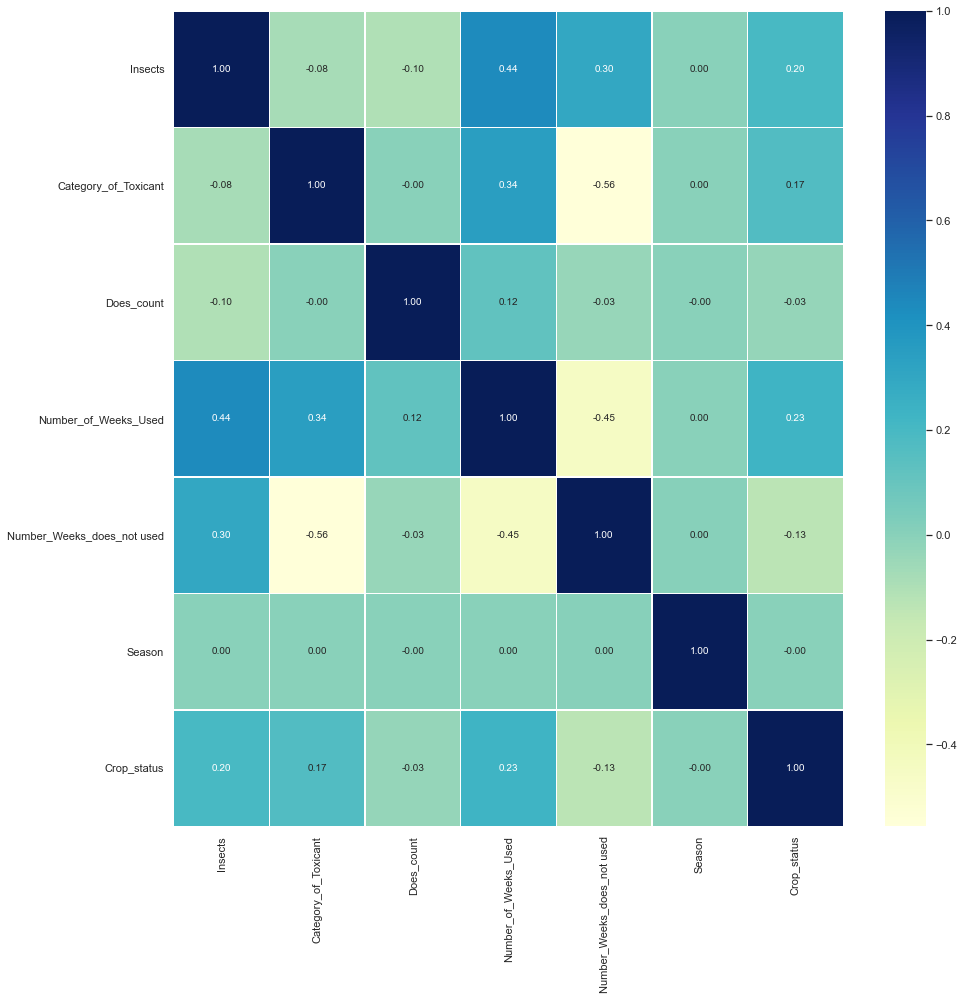

In [11]:
#correlation matrix
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

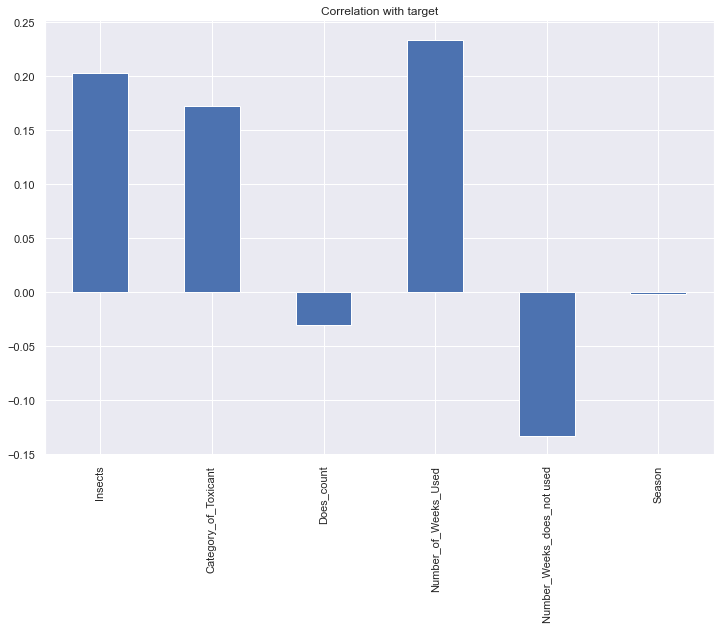

In [12]:
#correlation with target
data.drop('Crop_status', axis=1).corrwith(data.Crop_status).plot(kind='bar', grid=True,
                                                   figsize=(12, 8),title="Correlation with target")

## SPLITTING INTO CATEGORICAL & NUMERICAL cols:

In [13]:
#continuous cols
continuous=[]
categorical=[]
for col in data.columns:
    if len(data[col].unique()) <= 25:
        categorical.append(col)
    else:
        continuous.append(col)

In [14]:
categorical

['Crop', 'Soil', 'Category_of_Toxicant', 'Does_count', 'Season', 'Crop_status']

In [15]:
categorical

['Crop', 'Soil', 'Category_of_Toxicant', 'Does_count', 'Season', 'Crop_status']

In [16]:
continuous

['Insects', 'Number_of_Weeks_Used', 'Number_Weeks_does_not used']

## PLOTTING CATEGORICAL COLS:

In [17]:
#seeing values in categorical columns:
for i in categorical:
    print("Value counts in "+str(i))
    print(data[i].value_counts())

Value counts in Crop
Food    57333
Feed    22667
Name: Crop, dtype: int64
Value counts in Soil
clay    43556
silt    36444
Name: Soil, dtype: int64
Value counts in Category_of_Toxicant
2    57067
3    22170
1      763
Name: Category_of_Toxicant, dtype: int64
Value counts in Does_count
20    20344
40    11040
10    10881
30     9388
15     7405
5      4962
25     4396
60     3932
50     3056
35     1654
45      829
0       763
80      602
70      274
55      250
90       78
65       57
75       55
95       28
85        6
Name: Does_count, dtype: int64
Value counts in Season
2    39728
1    24233
3    16039
Name: Season, dtype: int64
Value counts in Crop_status
0    66716
1    11183
2     2101
Name: Crop_status, dtype: int64


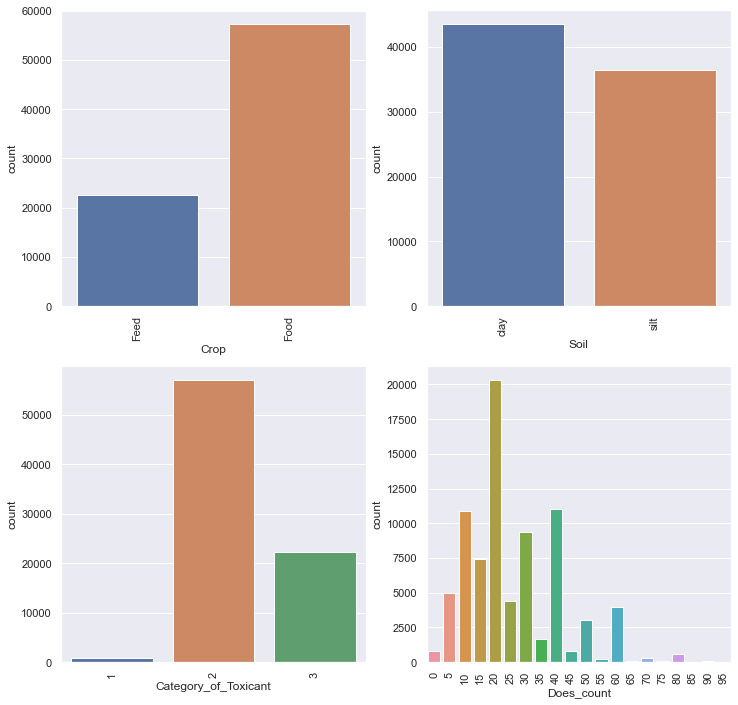

In [18]:
#plotting the same
fig, ax = plt.subplots(2, 2, figsize=(12, 12))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(data[variable], ax=subplot)
    plt.xlabel(variable)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

## PLOTTING CONTINUOUS COLS:

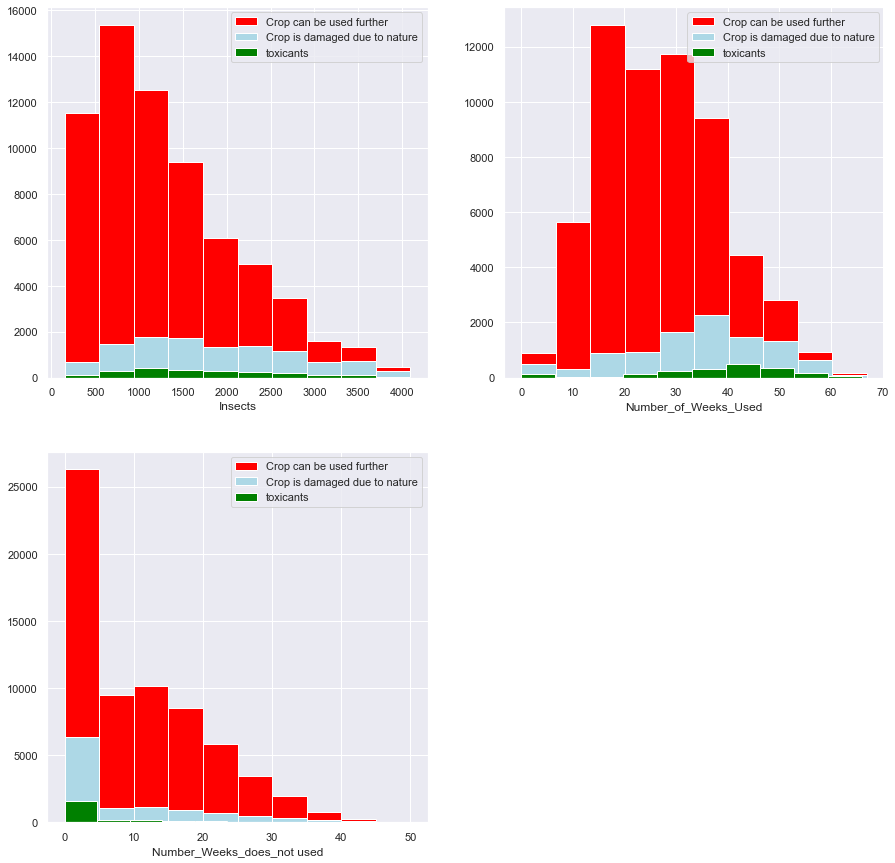

In [19]:
plt.figure(figsize=(15, 15))

for i,col in enumerate(continuous, 1):
    plt.subplot(2,2,i)
    data[data['Crop_status']==0][col].hist(bins=10,color='red',label='Crop can be used further')
    data[data['Crop_status']==1][col].hist(bins=10,color='lightblue',label='Crop is damaged due to nature')
    data[data['Crop_status']==2][col].hist(bins=10,color='green',label='toxicants')
    plt.legend()
    plt.xlabel(col)

In [20]:
dataset = pd.read_excel('/Users/priya/Desktop/Bootcamp_ml_problem/train_cropstatus.xlsx')
data = dataset.copy()
data.head()

,ID,Insects,Crop,Soil,Category_of_Toxicant,Does_count,Number_of_Weeks_Used,Number_Weeks_does_not used,Season,Crop_status
0,1,188,Feed,clay,1,0,0.0,0,1,0
1,2,209,Feed,clay,1,0,0.0,0,2,1
2,3,257,Feed,clay,1,0,0.0,0,2,1
3,4,257,Feed,silt,1,0,0.0,0,2,1
4,5,342,Feed,clay,1,0,0.0,0,2,1


In [21]:
#removing id column
data.drop('ID',axis = 1,inplace = True)
data.head()

,Insects,Crop,Soil,Category_of_Toxicant,Does_count,Number_of_Weeks_Used,Number_Weeks_does_not used,Season,Crop_status
0,188,Feed,clay,1,0,0.0,0,1,0
1,209,Feed,clay,1,0,0.0,0,2,1
2,257,Feed,clay,1,0,0.0,0,2,1
3,257,Feed,silt,1,0,0.0,0,2,1
4,342,Feed,clay,1,0,0.0,0,2,1


## OUTLIER HANDLING

In [31]:
numerical_features = [feature for feature in data.columns if data[feature].dtype != "O"]
descrete_features = [feature for feature in numerical_features if len(data[feature].unique())<25]
continuous_features = [feature for feature in numerical_features if feature not in descrete_features]

In [80]:
continuous_features

['Insects', 'Number_of_Weeks_Used', 'Number_Weeks_does_not used']

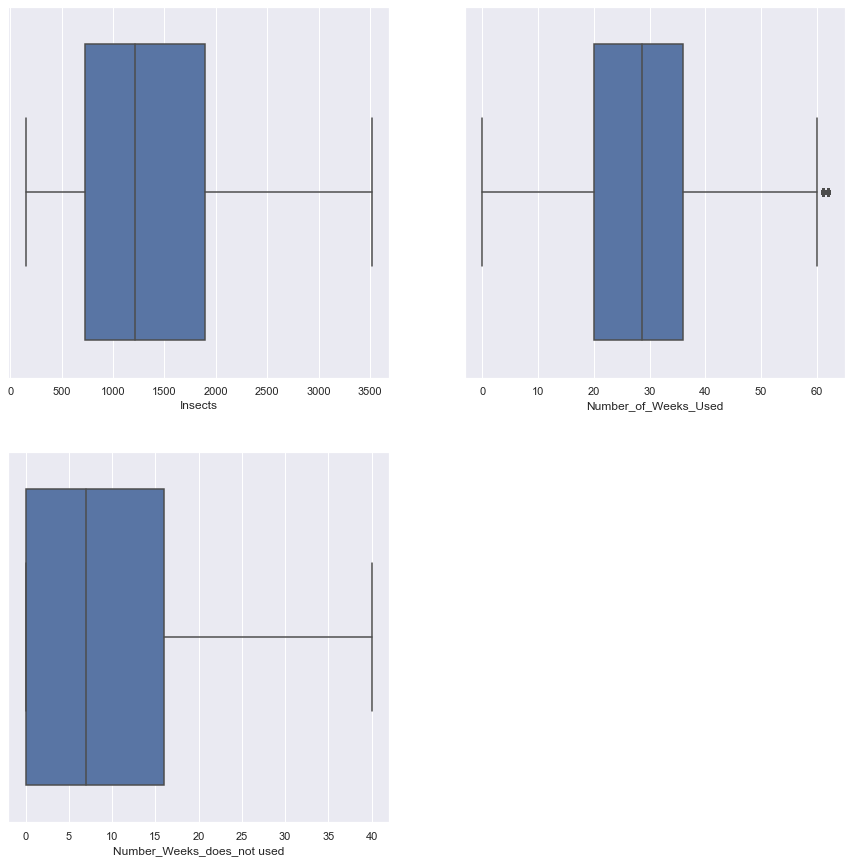

In [81]:
#let us plot outliers in continuous cols:
plt.figure(figsize=(15, 15))

for i,col in enumerate(continuous_features, 1):
    plt.subplot(2,2,i)
    sns.boxplot(x=data[col])

In [34]:
for i in continuous_features:
    q1 = data[i].quantile(0.25)
    q3 = data[i].quantile(0.75)
    iqr = q3-q1
    lowbound = q1-(1.5*iqr)
    highbound = q3+(1.5*iqr)
    data.loc[(data[i]<lowbound) | (data[i]>highbound),i] = data[i].median()

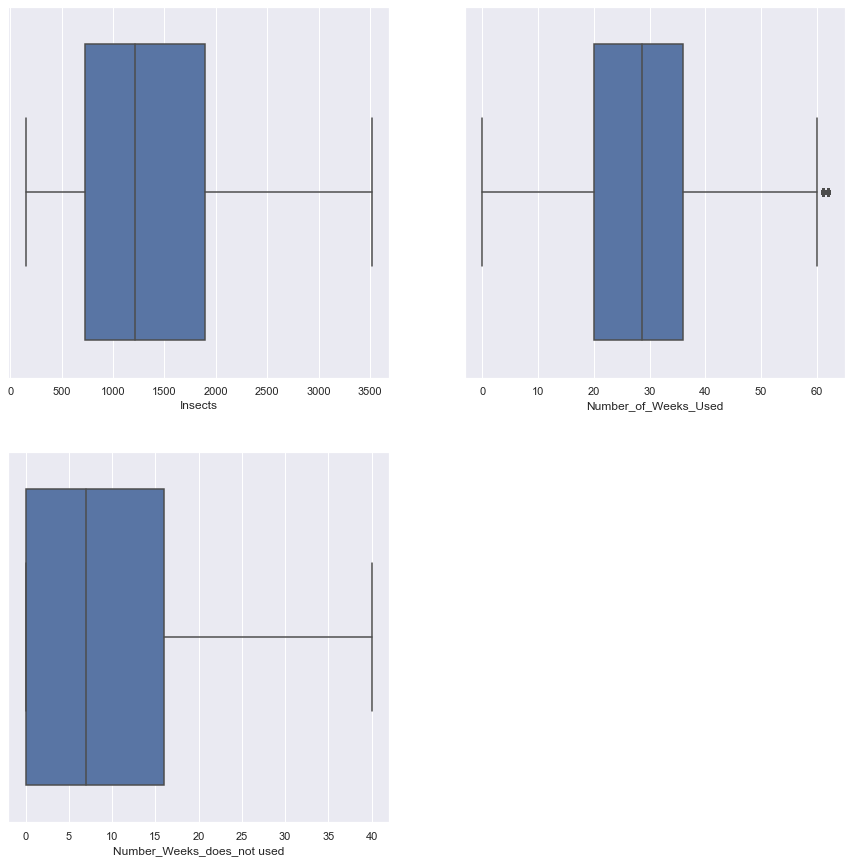

In [82]:
#let us plot outliers in continuous cols:
plt.figure(figsize=(15, 15))

for i,col in enumerate(continuous_features, 1):
    plt.subplot(2,2,i)
    sns.boxplot(x=data[col])

In [35]:
# counting outliers....
df = data.copy()
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

Category_of_Toxicant              0
Crop                              0
Crop_status                   13284
Does_count                      714
Insects                           0
Number_Weeks_does_not used        0
Number_of_Weeks_Used              0
Season                            0
Soil                              0
dtype: int64

## Changing object datatype into labels:

In [36]:
data.isna().sum()

Insects                          0
Crop                             0
Soil                             0
Category_of_Toxicant             0
Does_count                       0
Number_of_Weeks_Used          8055
Number_Weeks_does_not used       0
Season                           0
Crop_status                      0
dtype: int64

In [37]:
data.head()

,Insects,Crop,Soil,Category_of_Toxicant,Does_count,Number_of_Weeks_Used,Number_Weeks_does_not used,Season,Crop_status
0,188.0,Feed,clay,1,0,0.0,0.0,1,0
1,209.0,Feed,clay,1,0,0.0,0.0,2,1
2,257.0,Feed,clay,1,0,0.0,0.0,2,1
3,257.0,Feed,silt,1,0,0.0,0.0,2,1
4,342.0,Feed,clay,1,0,0.0,0.0,2,1


In [38]:
data['Crop'].replace(['Feed','Food'],[0,1], inplace=True)
data['Soil'].replace(['clay','silt'],[0,1], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Insects                     80000 non-null  float64
 1   Crop                        80000 non-null  int64  
 2   Soil                        80000 non-null  int64  
 3   Category_of_Toxicant        80000 non-null  int64  
 4   Does_count                  80000 non-null  int64  
 5   Number_of_Weeks_Used        71945 non-null  float64
 6   Number_Weeks_does_not used  80000 non-null  float64
 7   Season                      80000 non-null  int64  
 8   Crop_status                 80000 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 5.5 MB


## HANDLING NULL VALUES

In [39]:
data.isna().sum()

Insects                          0
Crop                             0
Soil                             0
Category_of_Toxicant             0
Does_count                       0
Number_of_Weeks_Used          8055
Number_Weeks_does_not used       0
Season                           0
Crop_status                      0
dtype: int64

In [40]:
data.Number_of_Weeks_Used=data.Number_of_Weeks_Used.fillna(data.Number_of_Weeks_Used.mean())

In [41]:
data.isna().sum()

Insects                       0
Crop                          0
Soil                          0
Category_of_Toxicant          0
Does_count                    0
Number_of_Weeks_Used          0
Number_Weeks_does_not used    0
Season                        0
Crop_status                   0
dtype: int64

# Handling imbalanced data n  TEST TRAIN SPLIT

In [42]:
dataY = data.iloc[:,-1]
dataY

0        0
1        1
2        1
3        1
4        1
        ..
79995    0
79996    0
79997    0
79998    0
79999    0
Name: Crop_status, Length: 80000, dtype: int64

In [43]:
data.drop('Crop_status',axis = 1,inplace = True)

In [44]:
dataX = data.iloc[:,:]
dataX

,Insects,Crop,Soil,Category_of_Toxicant,Does_count,Number_of_Weeks_Used,Number_Weeks_does_not used,Season
0,188.0,0,0,1,0,0.0,0.0,1
1,209.0,0,0,1,0,0.0,0.0,2
2,257.0,0,0,1,0,0.0,0.0,2
3,257.0,0,1,1,0,0.0,0.0,2
4,342.0,0,0,1,0,0.0,0.0,2
...,...,...,...,...,...,...,...,...
79995,209.0,1,1,2,20,12.0,6.0,2
79996,232.0,1,1,2,20,12.0,9.0,1
79997,256.0,1,1,2,10,14.0,10.0,1
79998,256.0,1,1,2,10,16.0,8.0,2


In [45]:
#test-train-split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataX, dataY, test_size=0.20, random_state=42)

In [46]:
#null accuracy
dataY.value_counts().head(1) / len(dataY)

0    0.83395
Name: Crop_status, dtype: float64

In [47]:
dataX.shape

(80000, 8)

In [48]:
dataY.shape

(80000,)

In [49]:
#handling imbalance using SMOTE
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
strategy = {0:66716, 1:33358, 2:33358}
#smt= SMOTETomek(random_state=42)
sm = SMOTE(sampling_strategy=strategy)
dataX, dataY = sm.fit_resample(dataX, dataY)

In [50]:
dataY.value_counts()

0    66716
2    33358
1    33358
Name: Crop_status, dtype: int64

## SCALING

In [51]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

X_train=sc.fit_transform(X_train)
X_train=pd.DataFrame(X_train,columns=X_test.columns)

X_test=sc.transform(X_test)
X_test=pd.DataFrame(X_test,columns=X_train.columns)

In [52]:
X_train.head()

,Insects,Crop,Soil,Category_of_Toxicant,Does_count,Number_of_Weeks_Used,Number_Weeks_does_not used,Season
0,1.324315,0.627478,-0.917774,-0.574881,-0.376614,0.719764,0.782045,0.148693
1,2.292936,-1.593682,1.089592,-2.730390,-1.661796,-2.444106,-0.972736,0.148693
2,-0.560880,-1.593682,-0.917774,-0.574881,-0.376614,0.000913,0.885268,-1.275914
3,-0.795736,0.627478,-0.917774,1.580628,-0.376614,-2.016556,-0.972736,0.148693
4,0.406473,0.627478,-0.917774,1.580628,2.193751,1.660374,-0.972736,0.148693


## PREDICTING & SCORING FUNCTION

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score

In [54]:
results_df = []

In [55]:

plt.figure(figsize=(15, 15))
count = 0
train_score = 0
test_score = 0
def scores(clf, X_train, y_train, X_test, y_test):
    count = 1
    pred = clf.predict(X_train)
    clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
    train_score = accuracy_score(y_train, pred) * 100
    print("Train Result:\n================================================")
    print(f"Training Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
    print("_______________________________________________")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")
    print("_______________________________________________")
    print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
    plt.subplot(2,2,count)
    plt.title('Training Confusion matrix')
    conf_matrix = confusion_matrix(y_train,pred)
    sns.heatmap(conf_matrix, annot=True, fmt=".2f")
    count = 2
    pred = clf.predict(X_test)
    clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
    test_score = accuracy_score(y_test, pred) * 100
    #roc_auc = roc_auc_score(y_test, pred, multi_class='ovr')
    print("Test Result:\n================================================")        
    print(f"Testing Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
    print("_______________________________________________")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")
    print("_______________________________________________")
    print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")
    plt.subplot(2,2,count)
    plt.title('Testing Confusion matrix')
    conftest_matrix = confusion_matrix(y_test,pred)
    sns.heatmap(conftest_matrix, annot=True, fmt=".2f")
    
    #results_df.append([clf,train_score,test_score,roc_auc])
    results_df.append([clf,train_score,test_score])

<Figure size 1080x1080 with 0 Axes>

## IMPLEMENTING MODELS

/Users/priya/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Result:
Training Accuracy Score: 83.28%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1       2  accuracy     macro avg  \
precision      0.838353     0.422353     0.0  0.832828      0.420235   
recall         0.992352     0.040080     0.0  0.832828      0.344144   
f1-score       0.908876     0.073213     0.0  0.832828      0.327363   
support    53350.000000  8957.000000  1693.0  0.832828  64000.000000   

           weighted avg  
precision      0.757956  
recall         0.832828  
f1-score       0.767879  
support    64000.000000  
_______________________________________________
Confusion Matrix: 
 [[52942   408     0]
 [ 8598   359     0]
 [ 1610    83     0]]



/Users/priya/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Result:
Testing Accuracy Score: 83.48%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1      2  accuracy     macro avg  \
precision      0.840614     0.431718    0.0  0.834812      0.424111   
recall         0.991995     0.044025    0.0  0.834812      0.345340   
f1-score       0.910052     0.079902    0.0  0.834812      0.329985   
support    13366.000000  2226.000000  408.0  0.834812  16000.000000   

           weighted avg  
precision      0.762290  
recall         0.834812  
f1-score       0.771351  
support    16000.000000  
_______________________________________________
Confusion Matrix: 
 [[13259   107     0]
 [ 2128    98     0]
 [  386    22     0]]



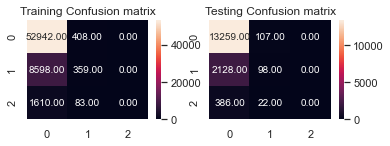

In [56]:
#Logistic Regression

lr = LogisticRegression()
lr.fit(X_train,y_train)
scores(lr, X_train, y_train, X_test, y_test)

Train Result:
Training Accuracy Score: 98.40%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1            2  accuracy     macro avg  \
precision      0.985465     0.974317     0.987831  0.984031      0.982538   
recall         0.998875     0.927543     0.815121  0.984031      0.913846   
f1-score       0.992125     0.950355     0.893204  0.984031      0.945228   
support    53350.000000  8957.000000  1693.000000  0.984031  64000.000000   

           weighted avg  
precision      0.983967  
recall         0.984031  
f1-score       0.983662  
support    64000.000000  
_______________________________________________
Confusion Matrix: 
 [[53290    55     5]
 [  637  8308    12]
 [  149   164  1380]]

Test Result:
Testing Accuracy Score: 74.45%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1           2  accuracy     macro avg  \
precision      0.865084     0.235008    0.0

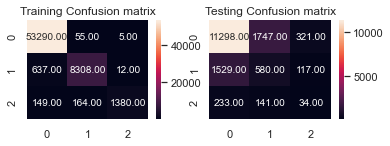

In [57]:
#decision tree
dr = DecisionTreeClassifier()
dr.fit(X_train,y_train)
scores(dr, X_train, y_train, X_test, y_test)

Train Result:
Training Accuracy Score: 98.40%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1            2  accuracy     macro avg  \
precision      0.989612     0.957437     0.939806  0.983969      0.962285   
recall         0.994639     0.944289     0.857649  0.983969      0.932193   
f1-score       0.992119     0.950818     0.896850  0.983969      0.946596   
support    53350.000000  8957.000000  1693.000000  0.983969  64000.000000   

           weighted avg  
precision      0.983792  
recall         0.983969  
f1-score       0.983819  
support    64000.000000  
_______________________________________________
Confusion Matrix: 
 [[53064   247    39]
 [  445  8458    54]
 [  112   129  1452]]

Test Result:
Testing Accuracy Score: 81.73%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1           2  accuracy     macro avg  \
precision      0.862613     0.362533    0.1

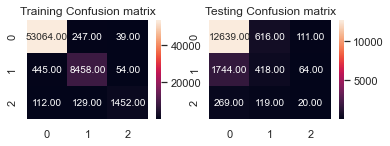

In [58]:
#random forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
scores(rf, X_train, y_train, X_test, y_test)

Train Result:
Training Accuracy Score: 86.36%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1            2  accuracy     macro avg  \
precision      0.881784     0.646526     0.622222  0.863594      0.716844   
recall         0.976326     0.342860     0.066155  0.863594      0.461780   
f1-score       0.926650     0.448092     0.119594  0.863594      0.498112   
support    53350.000000  8957.000000  1693.000000  0.863594  64000.000000   

           weighted avg  
precision      0.841993  
recall         0.863594  
f1-score       0.838325  
support    64000.000000  
_______________________________________________
Confusion Matrix: 
 [[52087  1248    15]
 [ 5833  3071    53]
 [ 1150   431   112]]

Test Result:
Testing Accuracy Score: 82.58%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1           2  accuracy     macro avg  \
precision      0.861857     0.379736    0.2

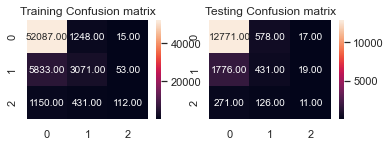

In [59]:
#knn
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
scores(knn, X_train, y_train, X_test, y_test)

#taking more time

from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

scores(svclassifier, X_train, y_train, X_test, y_test)

/Users/priya/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Result:
Training Accuracy Score: 84.35%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1       2  accuracy     macro avg  \
precision      0.852006     0.573327     0.0  0.843484      0.475111   
recall         0.990834     0.125265     0.0  0.843484      0.372033   
f1-score       0.916191     0.205607     0.0  0.843484      0.373933   
support    53350.000000  8957.000000  1693.0  0.843484  64000.000000   

           weighted avg  
precision      0.790466  
recall         0.843484  
f1-score       0.792506  
support    64000.000000  
_______________________________________________
Confusion Matrix: 
 [[52861   489     0]
 [ 7835  1122     0]
 [ 1347   346     0]]



/Users/priya/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Result:
Testing Accuracy Score: 84.24%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1      2  accuracy     macro avg  \
precision      0.852372     0.524590    0.0  0.842375      0.458988   
recall         0.989226     0.115004    0.0  0.842375      0.368077   
f1-score       0.915714     0.188651    0.0  0.842375      0.368122   
support    13366.000000  2226.000000  408.0  0.842375  16000.000000   

           weighted avg  
precision      0.785034  
recall         0.842375  
f1-score       0.791211  
support    16000.000000  
_______________________________________________
Confusion Matrix: 
 [[13222   144     0]
 [ 1970   256     0]
 [  320    88     0]]



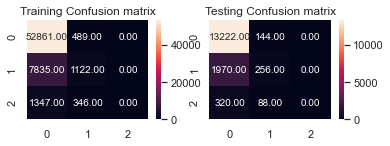

In [60]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

scores(xgb_clf, X_train, y_train, X_test, y_test)

In [61]:
results = pd.DataFrame(results_df, columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])

In [62]:
results

,Model,Training Accuracy %,Testing Accuracy %
0,LogisticRegression(),83.282813,83.48125
1,DecisionTreeClassifier(),98.403125,74.45000
2,"(DecisionTreeClassifier(max_features='auto', r...",98.396875,81.73125
3,KNeighborsClassifier(),86.359375,82.58125
4,XGBClassifier(objective='multi:softprob'),84.348437,84.23750


we can see from the results that xgb is giving good accuracy as well as good precision,recall.


Hence i select my final model as XGB

## preprocessing test data

In [70]:
to_predict_data = pd.read_excel('/Users/priya/Desktop/Bootcamp_ml_problem/test_cropstatus.xlsx')
to_predict = to_predict_data.copy()
to_predict

,ID,Insects,Crop,Soil,Category_of_Toxicant,Does_count,Number_of_Weeks_Used,Number_Weeks_does_not used,Season
0,1,188,Feed,silt,1,0,NaN,0,2
1,2,410,Feed,silt,1,0,0.0,0,2
2,3,626,Feed,clay,1,0,0.0,0,2
3,4,731,Feed,clay,1,0,0.0,0,2
4,5,789,Food,clay,1,0,0.0,0,1
...,...,...,...,...,...,...,...,...,...
34995,34996,677,Food,silt,2,40,27.0,3,1
34996,34997,731,Food,silt,2,10,8.0,20,3
34997,34998,732,Food,silt,2,10,10.0,20,2
34998,34999,731,Food,silt,2,10,31.0,2,2


In [71]:
to_predict = to_predict.iloc[:,1:]
to_predict

,Insects,Crop,Soil,Category_of_Toxicant,Does_count,Number_of_Weeks_Used,Number_Weeks_does_not used,Season
0,188,Feed,silt,1,0,NaN,0,2
1,410,Feed,silt,1,0,0.0,0,2
2,626,Feed,clay,1,0,0.0,0,2
3,731,Feed,clay,1,0,0.0,0,2
4,789,Food,clay,1,0,0.0,0,1
...,...,...,...,...,...,...,...,...
34995,677,Food,silt,2,40,27.0,3,1
34996,731,Food,silt,2,10,8.0,20,3
34997,732,Food,silt,2,10,10.0,20,2
34998,731,Food,silt,2,10,31.0,2,2


In [72]:
to_predict.isna().sum()

Insects                          0
Crop                             0
Soil                             0
Category_of_Toxicant             0
Does_count                       0
Number_of_Weeks_Used          3542
Number_Weeks_does_not used       0
Season                           0
dtype: int64

In [73]:
#handling missing values
to_predict.Number_of_Weeks_Used=to_predict.Number_of_Weeks_Used.fillna(data.Number_of_Weeks_Used.median())
to_predict.isna().sum()

Insects                       0
Crop                          0
Soil                          0
Category_of_Toxicant          0
Does_count                    0
Number_of_Weeks_Used          0
Number_Weeks_does_not used    0
Season                        0
dtype: int64

In [74]:
#changing object data type cols to  labelled cols
to_predict['Crop'].replace(['Feed','Food'],[0,1], inplace=True)
to_predict['Soil'].replace(['clay','silt'],[0,1], inplace=True)
to_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35000 entries, 0 to 34999
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Insects                     35000 non-null  int64  
 1   Crop                        35000 non-null  int64  
 2   Soil                        35000 non-null  int64  
 3   Category_of_Toxicant        35000 non-null  int64  
 4   Does_count                  35000 non-null  int64  
 5   Number_of_Weeks_Used        35000 non-null  float64
 6   Number_Weeks_does_not used  35000 non-null  int64  
 7   Season                      35000 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 2.1 MB


In [75]:
# scaling the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
topredict=sc.fit_transform(to_predict)
toPredictdata=pd.DataFrame(topredict,columns=to_predict.columns)
toPredictdata.head()

,Insects,Crop,Soil,Category_of_Toxicant,Does_count,Number_of_Weeks_Used,Number_Weeks_does_not used,Season
0,-1.419745,-1.585689,1.095956,-2.723919,-1.665629,-0.013897,-0.958744,0.142230
1,-1.158402,-1.585689,1.095956,-2.723919,-1.665629,-2.438658,-0.958744,0.142230
2,-0.904123,-1.585689,-0.912445,-2.723919,-1.665629,-2.438658,-0.958744,0.142230
3,-0.780515,-1.585689,-0.912445,-2.723919,-1.665629,-2.438658,-0.958744,0.142230
4,-0.712236,0.630641,-0.912445,-2.723919,-1.665629,-2.438658,-0.958744,-1.282922


In [76]:
#predicting
pred = xgb_clf.predict(toPredictdata)
pred

array([1, 1, 1, ..., 0, 0, 0])

In [77]:
#predictions
predictions = pd.DataFrame({
    'ID':to_predict_data.ID.values,
    'Crop_status':pred
})
predictions.head()

,ID,Crop_status
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1


In [79]:
predictions.to_csv('/Users/priya/Desktop/Bootcamp_ml_problem/final_predictions.csv',index=False,header=True)